<h4>Importando as bibliotecas que serão usadas.<h4>

In [1]:
import pandas as pd 
import numpy as np
#import datapane as dp
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sklearn.metrics as metrica
from  dash_bootstrap_templates  import  ThemeSwitchAIO
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [2]:
#os templetes que serão usados nos grafico plotli
templates = [
    "lux",
    "cyborg",
    "vapor",
    "zephyr",
    "superhero"
    "simplex"
]

ThemeSwitchAIO(templates)

Div([Span([Label(className='fa fa-moon'), Switch(id={'component': 'ThemeSwitchAIO', 'subcomponent': 'switch', 'aio_id': '7a3e4267-c4a1-444f-869a-a569c20bdf9b'}, className='d-inline-block ms-1', value=True), Label(className='fa fa-sun')]), Store(id={'component': 'ThemeSwitchAIO', 'subcomponent': 'store', 'aio_id': '7a3e4267-c4a1-444f-869a-a569c20bdf9b'}, data=['lux', 'cyborg', 'vapor', 'zephyr', 'superherosimplex']), Div(id={'component': 'ThemeSwitchAIO', 'subcomponent': 'dummy_div', 'aio_id': '7a3e4267-c4a1-444f-869a-a569c20bdf9b'})])

In [74]:
def tempo():
    tempo = datetime.now()
    return tempo
def final(x,y):
    print(f'Tempo de processamento: {x - y}')

arquivo = "Loja_de_Informática.xlsx"

<h4>checando tempo que o arquivo demora ate abri<h4>

In [76]:
inicio = tempo()

df = pd.read_excel(arquivo)

fim = tempo()

variavel1, variavel2 = df.shape

print("Numero de linhas:", variavel1)

print("Numero de colunas:", variavel2)

final(fim,inicio)

Numero de linhas: 5156
Numero de colunas: 13
Tempo de processamento: 0:00:01.672407


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5156 entries, 0 to 5155
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nota Fiscal    5156 non-null   int64         
 1   Data           5156 non-null   datetime64[ns]
 2   Vendedor       5156 non-null   object        
 3   Gerente        5156 non-null   object        
 4   Matriz         5156 non-null   object        
 5   Comissão       5156 non-null   object        
 6   % Comissão     5156 non-null   float64       
 7   Cidade/Estado  5156 non-null   object        
 8   Região         5156 non-null   object        
 9   Produto        5156 non-null   object        
 10  Qtde           5156 non-null   int64         
 11  Preço          5156 non-null   int64         
 12  Total          5156 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 523.8+ KB


In [6]:
df.describe(include='all')

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total
count,5156.000000,5156,5156,5156,5156,5156,5156.000000,5156,5156,5156,5156.000000,5156.000000,5156.000000
unique,NaN,1707,10,3,3,2,NaN,20,5,10,NaN,NaN,NaN
top,NaN,2014-08-12 00:00:00,Phelipe,Lucas,Sâo Paulo,Sim,NaN,Manaus/AM,Sudeste,Mouse Gamer,NaN,NaN,NaN
freq,NaN,9,545,2072,2088,3971,NaN,284,1791,580,NaN,NaN,NaN
first,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3797.500000,NaN,NaN,NaN,NaN,NaN,0.087859,NaN,NaN,NaN,52.727114,36.843483,1941.531614
std,1488.553325,NaN,NaN,NaN,NaN,NaN,0.021442,NaN,NaN,NaN,24.921024,29.299883,1935.531667
min,1220.000000,NaN,NaN,NaN,NaN,NaN,0.050000,NaN,NaN,NaN,10.000000,6.000000,60.000000
25%,2508.750000,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,31.000000,10.000000,529.500000


<h3>observando se tem valores nulos<h3>
<h5>sem valores nulos<h5>

In [7]:
df.isna().sum()

Nota Fiscal      0
Data             0
Vendedor         0
Gerente          0
Matriz           0
Comissão         0
% Comissão       0
Cidade/Estado    0
Região           0
Produto          0
Qtde             0
Preço            0
Total            0
dtype: int64

In [135]:
# Calcula o z-score para a coluna 'Total'
z_scores = np.abs((df['Total'] - df['Total'].mean()) / df['Total'].std())

# Define um limite para o z-score (por exemplo, 1) para identificar outliers
limite_z_score = 2.2

# Filtra o dataframe para manter apenas as linhas onde o z-score é menor ou igual ao limite
df_sem_outliers = df[z_scores <= limite_z_score]


In [114]:
print('tamanho da base original')

print(df.shape)

print('----------------------------------------------')

print('tamanho da nova base sem possiveis outliers')

print(df_sem_outliers.shape)

print('----------------------------------------------')

print('valores do z score')

print(z_scores)

tamanho da base original
(5156, 19)
----------------------------------------------
tamanho da nova base sem possiveis outliers
(5001, 19)
----------------------------------------------
valores do z score
0       1.037683
1       1.311510
2       0.190371
3       0.587193
4       0.845004
          ...   
5151    0.050874
5152    0.548444
5153    0.711707
5154    1.662834
5155    0.340200
Name: Total, Length: 5156, dtype: float64


Abaixo vou visualizar a tabela original e a tabela com corte de outliers vendo algumas metricas 

In [136]:
df_sem_outliers_total = df_sem_outliers['Total']
df_total = df['Total']
print('Base dados sem outliers \n', df_sem_outliers_total.describe())
print()
print('Base de dados original \n' ,df_total.describe())

Base dados sem outliers 
 count    4920.000000
mean     1666.141667
std      1487.723363
min        60.000000
25%       510.000000
50%      1118.000000
75%      2415.000000
max      6160.000000
Name: Total, dtype: float64

Base de dados original 
 count    5156.000000
mean     1941.531614
std      1935.531667
min        60.000000
25%       529.500000
50%      1224.000000
75%      2765.000000
max      9500.000000
Name: Total, dtype: float64


<h3>funcoes de graficos abaixo<h3>

In [129]:
def graficos01(base_dados, coluna,titulo):
    fig = px.box(base_dados, y= coluna, template= 'cyborg',height=500,width=1550,
                    title=titulo)
    fig.update_layout(font=dict(size=25),title_font=dict(size=30),yaxis_title=None,xaxis_title=None)
    return fig.show()

def graficos02(base_dados, coluna, titulo):
    seleçao = base_dados.value_counts().reset_index()
    
    fig = px.histogram(seleçao, x=coluna, y=0, template = 'vapor', text_auto = True,
                    title=titulo, height=500, width=1550,)
    fig.update_layout(font=dict(size=25) ,title_font=dict(size=25) ,yaxis_title=None, xaxis_title=None)
    return fig.show()

def grafico03(base_dados_01, base_dados_02, titulo_01, titulo_02):
    fig = make_subplots(rows=2, cols=1, subplot_titles=(titulo_01, titulo_02))

    # Adicionando os gráficos aos subplots
    fig.add_trace(px.histogram(x = base_dados_01 ,text_auto=True).data[0], row=2, col=1)
    fig.add_trace(px.histogram(x = base_dados_02 ,text_auto=True).data[0], row=1, col=1)

    # Atualizando layout dos subplots
    fig.update_layout(template='vapor',font=dict(size=20),title_font=dict(size=10))

    # Mostrar os gráficos
    return fig.show()

def grafico04(base_dados,base02,titulo):
    seleçao = df.groupby(base_dados)[base02].sum().reset_index().sort_values(base02,ascending=False)

    fig = px.histogram(seleçao, x=base_dados, y=base02,template='vapor',text_auto=True,
                    title=titulo,height=500,width=1550,)
    fig.update_layout(font=dict(size=18),title_font=dict(size=25),yaxis_title=None,xaxis_title=None)
    fig.show()

<h4>funcoes padrao abaixo<h4>

In [171]:
def analise_agg(base_dados,coluna_usada):
    #remover = ['Nota Fiscal','Data','% Comissão']
    #df_filtrado = base_dados.drop(remover, axis=1)
    informacoes = base_dados.groupby(coluna_usada).agg([np.mean, np.median, np.std,]).round()
    return informacoes

def vendas_ano_mes(base_dados, ano_ou_mes):
    df_filtrado2 = base_dados.get(['Data','Total'])
    df_data_index = df_filtrado2.set_index('Data')
    Vendas_ano = df_data_index.resample(ano_ou_mes).sum().plot(kind='line',figsize=(18, 5))
    return Vendas_ano

def metricas_Regressao(y_test,previsoes):
    variancia_explicada = metrica.explained_variance_score(y_test,previsoes)
    max_error = metrica.max_error(y_test,previsoes)
    mean_absolute_error = metrica.mean_absolute_error(y_test,previsoes)
    mean_squared_error = metrica.mean_squared_error(y_test,previsoes)
    median_absolute_error = metrica.median_absolute_error(y_test,previsoes)
    r2_score = metrica.r2_score(y_test,previsoes)
    
    print(f"variância explicada [A melhor pontuação possível é 1,0]: \n{variancia_explicada:.2f}"),
    
    print(f"calcula o erro residual máximo. maior erro que modelo cometeu [o melhor valor é 0,0]: \n{max_error:.2f}"),

    print(f"Perda de regressão de erro absoluto médio. media de erro que modelo cometeu [o melhor valor é 0,0]: \n{mean_absolute_error:.2f}"),

    print(f"Perda de regressão de erro quadrático médio. soma total de erros do modelo [o melhor valor é 0,0]: \n{mean_squared_error:.2f}"),

    print(f"Perda de regressão de erro absoluto mediana. A perda é calculada tomando a mediana [o melhor valor é 0,0]: \n{median_absolute_error:.2f}"),

    print(f"explica o quando as variaveis independentes estao explicando a variavel dependente [A melhor pontuação possível é 1,0]: \n{r2_score:.2f}")

    try:
        mean_squared_log_error = metrica.mean_squared_log_error(y_test,previsoes)
        mean_poisson_deviance = metrica.mean_poisson_deviance(y_test,previsoes)
        print(f"métrica e melhor com contagens populacionais,vendas médias de uma mercadoria ao longo de um período de anos, etc. [o melhor valor é 0,0]: \n{mean_squared_log_error:.2f}"),
        print(f"Perda média da regressão do desvio de Poisson. [o melhor valor é 0,0]: \n{mean_poisson_deviance:.2f}")
        
    except Exception as ErroInesperado:
        print(f"Ocorreu um Erro: {ErroInesperado}")

def Label_encoder(df, coluna1, coluna2):
    label_encoder = LabelEncoder()
    df[coluna1] = label_encoder.fit_transform(df[coluna2])

def ajustando(x):
    if x > 29:
        return 'alto'
    else:
        return 'baixo'




criando novas colunas abaixo

In [131]:
#criando coluna mes
df['Mes'] = df['Data'].dt.month
#criando coluna ano
df['ano'] = df['Data'].dt.year
#criar 3 novas colunas [produtos,matriz_nun,Comissão_nun] aplicando funçao label_encoder
Label_encoder(df,'produtos','Produto')
Label_encoder(df,'matriz_nun','Matriz')
Label_encoder(df,'Comissão_nun','Comissão')
#criar a coluna Quantidade
df['Quantidade'] = df['Qtde'].apply(ajustando)

In [137]:
# Criando os subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('venda Total da base original', 'venda total da base com outliers removidos',))

# Adicionando os gráficos aos subplots
fig.add_trace(go.Histogram(x=df['Total']), row=1, col=1)
fig.add_trace(go.Histogram(x=df_sem_outliers['Total']), row=1, col=2)

# Atualizando layout dos subplots
fig.update_layout(template='cyborg',font=dict(size=25),title_font=dict(size=10),xaxis=dict(title='', dtick=1000))

# Mostrar os gráficos
fig.show()

In [14]:
graficos01(df, 'Preço', 'box plot com os preços')

In [15]:
graficos01(df, 'Qtde', 'box plot com as quantidade de produtos vendido por vendas')

In [16]:
graficos01(df, 'Total', 'visualizando o total de vendas base original')

In [138]:
graficos01(df_sem_outliers, 'Total', 'visualizando total de vendas base sem outliers')

In [18]:
graficos02(df, 'Gerente', 'numero de venda de cada gerente  o gerente lucas possui 1 vendedor a mas')

In [139]:
#grafico indica quanto cada gerente vendeu usando a base original e base sem outliers
fig2 = make_subplots(rows=1, cols=2, subplot_titles=('venda Total da base original', 'venda total da base com outliers removidos'))
# Adicionando os gráficos aos subplots

fig2.add_trace(go.Histogram(x = df['Gerente']), row=1, col=1)
fig2.add_trace(go.Histogram(x = df_sem_outliers['Gerente']), row=1, col=2)

# Atualizando layout dos subplots
fig2.update_layout(template='vapor',font=dict(size=25),title_font=dict(size=10))

# Mostrar os gráficos
fig2.show()

A mesma lógica do gráfico de cima, só que mostrado de uma forma diferente.

In [140]:
#grafico indica quanto cada gerente vendeu usando a base original e base sem outliers
grafico03(df['Gerente'], df_sem_outliers['Gerente'], 'venda total da base com outliers removidos', 'venda Total da base original')

In [141]:
#Gráfico indica quanto cada vendedor vendeu usando a base original e a base sem outliers
grafico03(df['Vendedor'], df_sem_outliers['Vendedor'], 'venda total da base com outliers removidos', 'venda Total da base original')

In [22]:
#grafico indica quanto cada matriz vendeu usando a base original e base sem outliers
grafico03(df['Matriz'], df_sem_outliers['Matriz'], 'venda total da base com outliers removidos', 'venda Total da base original')

In [23]:
#grafico indica quanto cada Regiao vendeu usando a base original e base sem outliers
grafico03(df['Região'], df_sem_outliers['Região'], 'venda total da base com outliers removidos', 'venda Total da base original')

In [24]:
#grafico indica quanto cada estado vendeu usando a base original e base sem outliers
grafico03(df['Cidade/Estado'], df_sem_outliers['Cidade/Estado'], 'venda total da base com outliers removidos', 'venda Total da base original')

no grafico abaixo podemos notar que dos 10 protudos somente 2 tem seu valor reduzidos pelos outliers 'Monitor Gamer', 'Mouse basic'. 
Monitor Basic apresenta uma queda muito grande 

In [142]:
grafico03(df['Produto'], df_sem_outliers['Produto'], 'venda total da base com outliers removidos', 'venda Total da base original')

In [26]:
#vendo preco de cada produto mouse basic possui 2 preços 50 e 60 
df.groupby('Produto')['Preço'].unique()

Produto
Gabinete              [40]
Monitor Basic        [100]
Monitor Gamer         [70]
Mouse Basic       [50, 60]
Mouse Gamer           [10]
Mousepad               [6]
Mousepad Gamer        [18]
Placa de Vídeo        [25]
Teclado               [35]
USB                    [8]
Name: Preço, dtype: object

In [27]:
grafico04('Produto','Qtde','Quantidade de produto vendido')

temos um grafico do valor total vendido de cada produto podemos notar que mesmo as vendas<br> sendo parecidas
quando se nota total vendido o monitor basic fica muito a frente pelo seu preço<br> ser bem maior que os outros produtos
100 por unidade enquanto mouse pad o produto mas barato custa apenas 6

In [28]:
grafico04('Produto','Total','Total em reais$ vendido de cada produto')

In [146]:
grafico04('Região','Total','Total em reais vendido em cada regiao')

In [30]:
vendas_comissao = px.box(df, x='Comissão', y='Total',template='superhero',width=1400,height=500,
             title='Venda total com Comissão e sem Comissão')
vendas_comissao.update_layout(font=dict(size=32),title_font=dict(size=30))

In [185]:
df_info1 = df[['Qtde','Preço','Total','Vendedor','Gerente','Matriz']]
df_info2 = df_sem_outliers[['Qtde','Preço','Total','Vendedor','Gerente','Matriz']]


Abaixo vamos pegar os gerentes e puxar algumas métricas media mediana e desvio padrão

In [186]:

display(analise_agg(df_info1,'Gerente'))
print('               base abaixo com informaçoes sem outliers' )
display(analise_agg(df_info2,'Gerente'))

Qtde              Preço                Total                
          mean median   std  mean median   std    mean  median     std
Gerente                                                               
Daniella  52.0   53.0  25.0  38.0   35.0  29.0  1989.0  1280.0  1935.0
David     52.0   51.0  25.0  37.0   25.0  30.0  1921.0  1152.0  1965.0
Lucas     53.0   53.0  25.0  36.0   25.0  29.0  1922.0  1212.0  1914.0

               base abaixo com informaçoes sem outliers


Qtde              Preço                Total                
          mean median   std  mean median   std    mean  median     std
Gerente                                                               
Daniella  51.0   51.0  25.0  35.0   25.0  27.0  1730.0  1200.0  1521.0
David     51.0   49.0  24.0  34.0   25.0  28.0  1614.0  1050.0  1453.0
Lucas     52.0   52.0  25.0  33.0   25.0  27.0  1658.0  1100.0  1487.0

In [187]:
#analisando os vendedores
display(analise_agg(df_info1,'Vendedor'))
print('               base abaixo com informaçoes sem outliers' )
display(analise_agg(df_info2,'Vendedor'))

Qtde              Preço                Total                
          mean median   std  mean median   std    mean  median     std
Vendedor                                                              
Deborah   53.0   53.0  25.0  38.0   35.0  29.0  1968.0  1279.0  1862.0
Edson     52.0   51.0  25.0  38.0   25.0  30.0  1969.0  1172.0  2016.0
Henrique  54.0   55.0  25.0  36.0   25.0  29.0  1917.0  1160.0  1890.0
Jorge     52.0   52.0  25.0  39.0   35.0  29.0  2052.0  1349.0  1948.0
Jéssica   51.0   49.0  25.0  37.0   25.0  31.0  1880.0  1140.0  1986.0
Marina    52.0   50.0  24.0  36.0   25.0  28.0  1906.0  1190.0  1902.0
Phelipe   53.0   54.0  26.0  35.0   25.0  29.0  1899.0  1100.0  2003.0
Ricardo   53.0   53.0  25.0  37.0   35.0  29.0  1892.0  1200.0  1847.0
Rodrigo   53.0   54.0  25.0  36.0   25.0  28.0  1950.0  1250.0  1999.0
Ronaldo   56.0   56.0  25.0  36.0   25.0  29.0  1995.0  1275.0  1900.0

               base abaixo com informaçoes sem outliers


Qtde              Preço                Total                
          mean median   std  mean median   std    mean  median     std
Vendedor                                                              
Deborah   52.0   52.0  25.0  35.0   25.0  27.0  1753.0  1212.0  1532.0
Edson     50.0   49.0  24.0  34.0   25.0  27.0  1618.0  1080.0  1428.0
Henrique  52.0   53.0  25.0  34.0   25.0  27.0  1663.0   980.0  1483.0
Jorge     50.0   50.0  24.0  37.0   35.0  27.0  1800.0  1260.0  1555.0
Jéssica   50.0   47.0  25.0  34.0   25.0  28.0  1560.0   980.0  1450.0
Marina    51.0   49.0  24.0  33.0   25.0  26.0  1653.0  1085.0  1490.0
Phelipe   51.0   52.0  25.0  32.0   25.0  26.0  1564.0  1026.0  1460.0
Ricardo   51.0   51.0  24.0  35.0   25.0  27.0  1680.0  1140.0  1482.0
Rodrigo   51.0   51.0  25.0  33.0   25.0  25.0  1640.0  1152.0  1476.0
Ronaldo   54.0   54.0  25.0  34.0   25.0  27.0  1744.0  1200.0  1517.0

In [188]:
#analisando as matriz
display(analise_agg(df_info1,'Matriz'))
print('               base abaixo com informaçoes sem outliers' )
display(analise_agg(df_info2,'Matriz'))

Qtde              Preço                Total                
                mean median   std  mean median   std    mean  median     std
Matriz                                                                      
Belo Horizonte  52.0   52.0  25.0  37.0   35.0  29.0  1948.0  1255.0  1898.0
Curitibaa       53.0   52.0  25.0  36.0   25.0  29.0  1915.0  1170.0  1958.0
Sâo Paulo       53.0   54.0  25.0  37.0   25.0  29.0  1957.0  1225.0  1946.0

               base abaixo com informaçoes sem outliers


Qtde              Preço                Total                
                mean median   std  mean median   std    mean  median     std
Matriz                                                                      
Belo Horizonte  51.0   50.0  24.0  35.0   25.0  27.0  1709.0  1155.0  1509.0
Curitibaa       51.0   49.0  25.0  33.0   25.0  27.0  1621.0  1068.0  1469.0
Sâo Paulo       52.0   52.0  25.0  34.0   25.0  27.0  1668.0  1100.0  1486.0

Abaixo, vou rodar um teste de Shapiro para saber se nossa base de dados segue uma distribuição normal.

In [189]:
from scipy import stats

# Amostra de exemplo vou usar base original
data = np.array(df['Total'])

# Executar o teste de Shapiro para saber se os dados tem uma distribuiçao normal
statistic, p_value = stats.shapiro(data)

# Imprimir os resultados
print('Estatística de teste:', statistic)
print('Valor p:', p_value)

# Interpretação do resultado
alpha = 0.05  # Nível de significância

if p_value > alpha:
    print('A amostra segue uma distribuição normal (não podemos rejeitar a hipótese nula)')
else:
    print('A amostra não segue uma distribuição normal (rejeitamos a hipótese nula)')


Estatística de teste: 0.8188644647598267
Valor p: 0.0
A amostra não segue uma distribuição normal (rejeitamos a hipótese nula)


Visualizando a correlaçao dos dados da pra notar uma forte correlaçao do preco com o total
e Quantidade com a comissao 

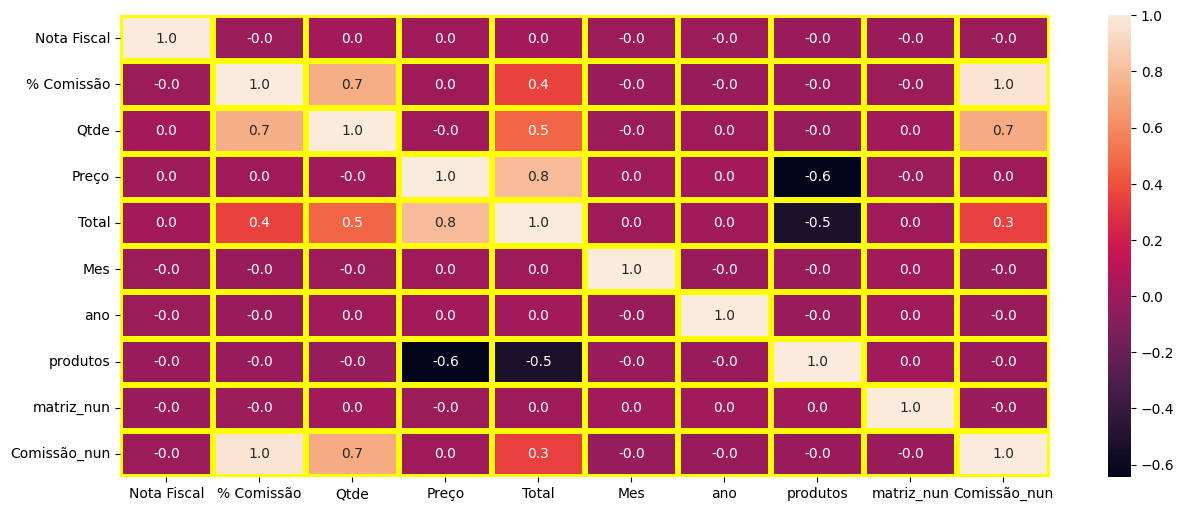

In [35]:
import seaborn as sn
correlaçao = df.corr()
plt.figure(figsize=(15, 6))

sn.heatmap(correlaçao, annot = True, fmt=".1f", linewidths=4, linecolor='yellow');  

In [36]:
#todos os registros com menos de 30 em quantidade nao tem comissao 
#todos os registros com 30 ou mais de quantidade tem comissao 'sim'
testando_hipotese = df[(df['Quantidade'] == 'alto') & (df['Comissão'] == 'Sim')]
testando_hipotese

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Mes,ano,produtos,matriz_nun,Comissão_nun,Quantidade
0,1220,2015-04-29,Phelipe,Lucas,Sâo Paulo,Sim,0.1,Poços de Caldas/MG,Sudeste,Mouse Basic,79,50,3950,4,2015,3,2,1,alto
1,1221,2016-05-21,Ricardo,Lucas,Belo Horizonte,Sim,0.1,Curitiba/PR,Sul,Monitor Gamer,64,70,4480,5,2016,2,0,1,alto
2,1222,2016-03-17,Ronaldo,Lucas,Sâo Paulo,Sim,0.1,Curitiba/PR,Sul,Monitor Gamer,33,70,2310,3,2016,2,2,1,alto
4,1224,2013-03-18,Ronaldo,Lucas,Sâo Paulo,Sim,0.1,Cuiabá/MT,Centro-Oeste,Mousepad,51,6,306,3,2013,5,2,1,alto
5,1225,2016-11-12,Jorge,Daniella,Belo Horizonte,Sim,0.1,Palmas/TO,Centro-Oeste,Mouse Gamer,52,10,520,11,2016,4,0,1,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149,6369,2015-10-02,Ronaldo,Lucas,Sâo Paulo,Sim,0.1,Curitiba/PR,Sul,Mouse Basic,50,60,3000,10,2015,3,2,1,alto
5151,6371,2014-01-19,Ricardo,Lucas,Belo Horizonte,Sim,0.1,Porto Velho/RO,Norte,Gabinete,51,40,2040,1,2014,0,0,1,alto
5152,6372,2014-07-08,Deborah,Daniella,Sâo Paulo,Sim,0.1,Goiânia/GO,Centro-Oeste,Mouse Gamer,88,10,880,7,2014,4,2,1,alto
5153,6373,2015-08-21,Marina,Lucas,Belo Horizonte,Sim,0.1,Curitiba/PR,Sul,Mousepad,94,6,564,8,2015,5,0,1,alto


In [37]:
#se quantidade for maior que 31 comissao e 'sim' e % Comissão igual 0.1.  qualquer valor abaixo de 31
# comissao vira 'nao' e %comissao vira 0.05
testando_hipotese2 = df[(df['% Comissão'] == 0.1) & (df['Qtde'] == 31)]
testando_hipotese2.head(5)

,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Mes,ano,produtos,matriz_nun,Comissão_nun,Quantidade
18,1238,2015-08-11,Jorge,Daniella,Belo Horizonte,Sim,0.1,Goiânia/GO,Centro-Oeste,Monitor Basic,31,100,3100,8,2015,1,0,1,alto
165,1385,2014-08-17,Edson,David,Sâo Paulo,Sim,0.1,Curitiba/PR,Sul,Gabinete,31,40,1240,8,2014,0,2,1,alto
177,1397,2017-08-19,Edson,David,Sâo Paulo,Sim,0.1,Palmas/TO,Centro-Oeste,Mouse Gamer,31,10,310,8,2017,4,2,1,alto
223,1443,2013-01-04,Phelipe,Lucas,Sâo Paulo,Sim,0.1,Cuiabá/MT,Centro-Oeste,Mousepad Gamer,31,18,558,1,2013,6,2,1,alto
374,1594,2013-07-22,Deborah,Daniella,Sâo Paulo,Sim,0.1,Maceió/AL,Nordeste,Mouse Gamer,31,10,310,7,2013,4,2,1,alto


In [38]:
#venda total em cada ano Qtde e preco dos produtos
#no ano de 2015 total faturado foi maior devido a seus precos mas alto em relacao os outro anos 
#em 2017 teve uma queda nas vendas mas sua media se manteve em 53 
df.groupby(df['Data'].dt.year)['Total','Qtde','Preço'].agg([np.sum,np.mean,np.median]).round()

Total                   Qtde               Preço             
          sum    mean  median    sum  mean median    sum  mean median
Data                                                                 
2013  1980082  1847.0  1068.0  56117  52.0   52.0  37314  35.0   25.0
2014  2022303  1952.0  1212.0  55237  53.0   52.0  37640  36.0   25.0
2015  2099193  2003.0  1380.0  55033  53.0   53.0  40578  39.0   35.0
2016  2002878  1977.0  1260.0  53507  53.0   52.0  38033  38.0   25.0
2017  1906081  1931.0  1200.0  51967  53.0   53.0  36400  37.0   25.0

In [39]:
# tabela dinâmica (pivot table) para agrupar os dados por ano e produto, com a quantidade como valor
pivot_table = df.pivot_table(index=df['Data'].dt.year, columns='Produto', values='Qtde', aggfunc='sum')

# Renomear o índice (Data) para 'Ano'
pivot_table.index.name = 'Ano'

# Imprimir a tabela dinâmica
pivot_table


Produto,Gabinete,Monitor Basic,Monitor Gamer,Mouse Basic,Mouse Gamer,Mousepad,Mousepad Gamer,Placa de Vídeo,Teclado,USB
Ano,,,,,,,,,,
2013,5090,5147,5515,4870,7371,5737,5232,6387,5015,5753
2014,6075,5312,5640,5085,5643,5666,5614,5361,5036,5805
2015,5687,5550,5952,5650,6556,4620,5308,5469,5718,4523
2016,5624,5610,4798,5615,6562,4457,4853,5814,5100,5074
2017,5485,5205,4714,5302,5745,5470,5527,5024,4695,4800


grafico de baixo representa os numero de cima 

In [40]:
fig = px.line(pivot_table, title='Gráfico de Linha',template='cyborg',height=720,width=1550,
              color_discrete_sequence=['blue','red','green','grey','yellow','darkviolet','orange','Violet','white','darkblue'])
fig.update_layout(font=dict(size=25),title_font=dict(size=20),yaxis_title=None,xaxis_title=None)
fig.update_yaxes(tickvals=[4500,4700,4900,5100,5300,5500,5700,5900,6100,6300,6500,6700,6900,7100,7300,7500])
fig.update_xaxes(tickvals=[2013,2014,2015,2016,2017])
fig

In [41]:
soma_quantidade_baixo = (df['Quantidade'] == 'baixo').sum()
soma_quantidade_alto = (df['Quantidade'] == 'alto').sum()
total = len(df['Região'])
soma_quantidade_baixo = round(soma_quantidade_baixo/total*100, 2)
soma_quantidade_alto = round(soma_quantidade_alto/total*100, 2)
print('valores baixos:',soma_quantidade_baixo,'%')
print('valores alto:',soma_quantidade_alto,'%')

valores baixos: 22.98 %
valores alto: 77.02 %


In [42]:
#coletei uma amostra de 500 dados retirado da base original
amostra = df.sample(n=500, random_state=42)  # O random_state é opcional, mas garante coletar a mesma amostra

amostra.head(5)


,Nota Fiscal,Data,Vendedor,Gerente,Matriz,Comissão,% Comissão,Cidade/Estado,Região,Produto,Qtde,Preço,Total,Mes,ano,produtos,matriz_nun,Comissão_nun,Quantidade
2873,4093,2016-02-10,Marina,Lucas,Belo Horizonte,Não,0.05,Salvador/BA,Nordeste,Teclado,22,35,770,2,2016,8,0,0,baixo
486,1706,2013-06-15,Jéssica,David,Curitibaa,Sim,0.10,Belo Horizonte/MG,Sudeste,Gabinete,71,40,2840,6,2013,0,1,1,alto
2794,4014,2013-12-22,Ricardo,Lucas,Belo Horizonte,Sim,0.10,Andradas/MG,Sudeste,Mousepad,49,6,294,12,2013,5,0,1,alto
3525,4745,2015-05-24,Phelipe,Lucas,Sâo Paulo,Não,0.05,Campo Grande/MS,Centro-Oeste,Monitor Gamer,24,70,1680,5,2015,2,2,0,baixo
5149,6369,2015-10-02,Ronaldo,Lucas,Sâo Paulo,Sim,0.10,Curitiba/PR,Sul,Mouse Basic,50,60,3000,10,2015,3,2,1,alto


In [43]:
#checando a assimetria e kurtosis da amostra
print(amostra.skew().round(2),end="\n--------------------------\n")
print(amostra.kurtosis().round(2))

Nota Fiscal    -0.08
% Comissão     -1.25
Qtde            0.03
Preço           0.93
Total           1.69
Mes             0.01
ano            -0.01
produtos       -0.04
matriz_nun     -0.23
Comissão_nun   -1.33
dtype: float64
--------------------------
Nota Fiscal    -1.33
% Comissão     -0.45
Qtde           -1.27
Preço          -0.27
Total           2.64
Mes            -1.26
ano            -1.15
produtos       -1.13
matriz_nun     -1.49
Comissão_nun   -0.24
dtype: float64


In [44]:
amostra.describe()

,Nota Fiscal,% Comissão,Qtde,Preço,Total,Mes,ano,produtos,matriz_nun,Comissão_nun
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,3855.966000,0.088200,52.884000,35.386000,1858.628000,6.292000,2014.984000,4.618000,1.120000,0.77600
std,1566.106622,0.021252,25.534027,29.839333,1937.404889,3.536063,1.353295,2.799241,0.823989,0.41734
min,1228.000000,0.050000,10.000000,6.000000,60.000000,1.000000,2013.000000,0.000000,0.000000,0.00000
25%,2395.750000,0.100000,31.750000,10.000000,500.000000,3.000000,2014.000000,2.000000,0.000000,1.00000
50%,3986.500000,0.100000,51.000000,25.000000,1062.500000,6.000000,2015.000000,5.000000,1.000000,1.00000
75%,5242.250000,0.100000,77.000000,60.000000,2592.500000,9.000000,2016.000000,7.000000,2.000000,1.00000
max,6372.000000,0.100000,95.000000,100.000000,9500.000000,12.000000,2017.000000,9.000000,2.000000,1.00000


<AxesSubplot:xlabel='Data'>

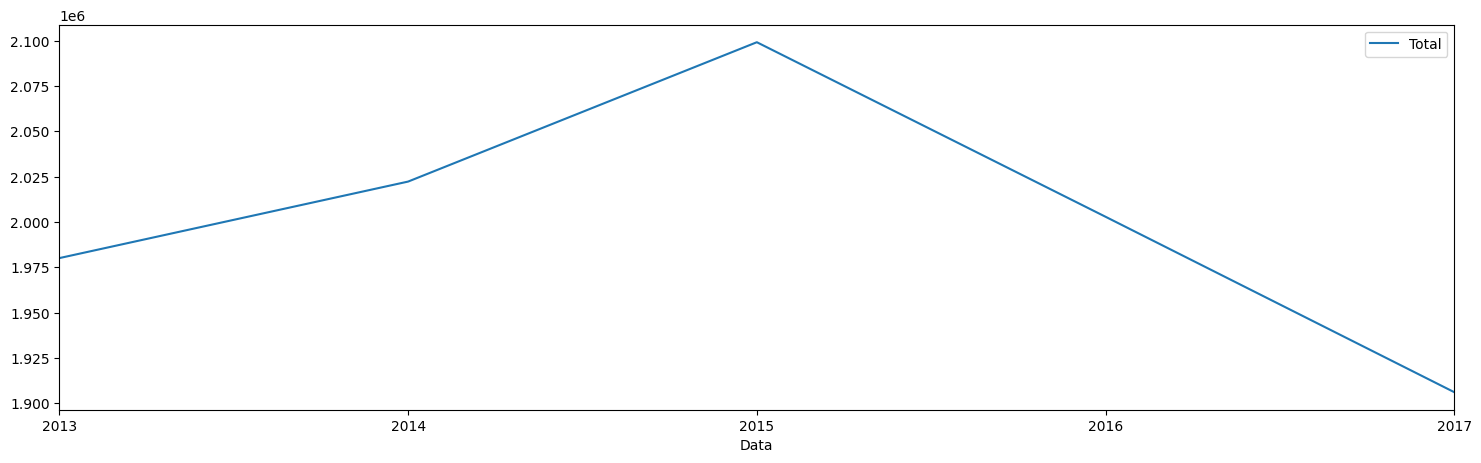

In [45]:
#grafico mostra total vendido ao longo dos anos
vendas_ano_mes(df,'A')

Vendas por mes

<AxesSubplot:xlabel='Data'>

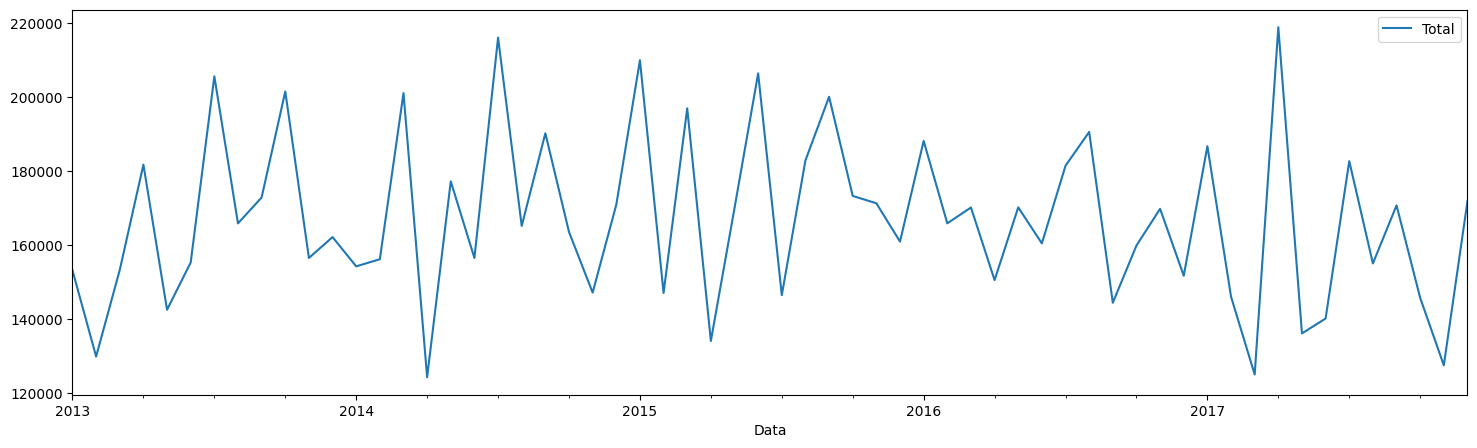

In [46]:
#grafico mostra total vendido ao longo dos meses
vendas_ano_mes(df,'M')

In [47]:
df_filtrado2 = df.get(['Data','Total'])
df_data_index = df_filtrado2.set_index('Data')


In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [49]:
arima = df_data_index.resample('M').sum()

decomposiçao = seasonal_decompose(arima)

tendencia = decomposiçao.trend

sazonal = decomposiçao.seasonal

resid = decomposiçao.resid

<h3>plotando graficos original , tendencia dos dados , sazonalidade dos dados e residuo dos dados<h3>
<h5>da para observa que dados seguem uma tendencia de crescimento ate 2015 depois começa a cair <h5>
<h5>os dados conta com sazonalidade<h5>

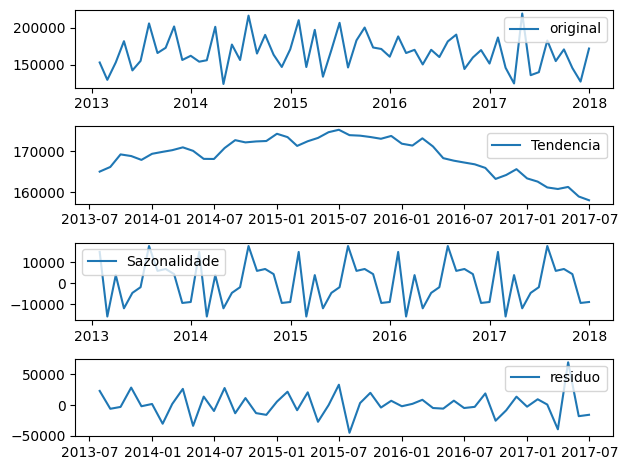

In [50]:
plt.subplot(4,1,1)
plt.plot(arima,label = 'original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia,label = 'Tendencia')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal,label = 'Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(resid,label = 'residuo')
plt.legend(loc = 'best')
plt.tight_layout()

In [51]:
serie = (df['Produto'].value_counts(normalize=True)*100)
serie2 = (df['Vendedor'].value_counts(normalize=True)*100)
def formatar_percentual(valor):
    return f"{valor:.2f}%"

# Aplica a função de formatação aos valores da série
percentual_formatado = serie.apply(formatar_percentual)
percentual_formatado2 = serie2.apply(formatar_percentual)

print(percentual_formatado)
display(percentual_formatado2)

Mouse Gamer       11.25%
Placa de Vídeo    10.42%
Mouse Basic       10.03%
Gabinete           9.87%
Mousepad Gamer     9.83%
Monitor Gamer      9.81%
Mousepad           9.81%
Monitor Basic      9.81%
USB                9.62%
Teclado            9.54%
Name: Produto, dtype: object


Phelipe     10.57%
Deborah     10.24%
Jéssica     10.24%
Edson       10.09%
Ricardo     10.07%
Marina       9.95%
Rodrigo      9.95%
Henrique     9.87%
Ronaldo      9.60%
Jorge        9.43%
Name: Vendedor, dtype: object

In [52]:
df_ml = df.get(['Qtde','Preço'])
df_prev = df.get('Total')


nos codigo abaixo vou criar 2 modelo usando quantidade e preço para prever o total vendido<br>
primeiro modelo sera de regressao linear simples <br>
segundo modelo irei usar o XGB

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrica
# Divide o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_ml, df_prev, test_size=0.30, random_state=42)

# Cria um modelo de Regressão Logística
modelo = LinearRegression()

# Treina o modelo
modelo.fit(X_train, y_train)

# Faz previsões no conjunto de teste
previsoes = modelo.predict(X_test)

# Calcula o erro
metricas_Regressao(y_test,previsoes)

variância explicada [A melhor pontuação possível é 1,0]: 
0.86
calcula o erro residual máximo. maior erro que modelo cometeu [o melhor valor é 0,0]: 
2697.72
Perda de regressão de erro absoluto médio. media de erro que modelo cometeu [o melhor valor é 0,0]: 
527.66
Perda de regressão de erro quadrático médio. soma total de erros do modelo [o melhor valor é 0,0]: 
546199.88
Perda de regressão de erro absoluto mediana. A perda é calculada tomando a mediana [o melhor valor é 0,0]: 
403.33
explica o quando as variaveis independentes estao explicando a variavel dependente [A melhor pontuação possível é 1,0]: 
0.86
Ocorreu um Erro: Mean Squared Logarithmic Error cannot be used when targets contain negative values.


In [54]:
import xgboost as xgb

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df_ml, df_prev, test_size=0.30, random_state=42)

# Criar o modelo de regressão com XGBoost
model = xgb.XGBRegressor(
    learning_rate=0.9,
    n_estimators=9000,
    max_depth=3,
    objective='reg:squarederror',
    random_state=42
)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro 
metricas_Regressao(y_test, y_pred)

variância explicada [A melhor pontuação possível é 1,0]: 
1.00
calcula o erro residual máximo. maior erro que modelo cometeu [o melhor valor é 0,0]: 
71.28
Perda de regressão de erro absoluto médio. media de erro que modelo cometeu [o melhor valor é 0,0]: 
0.47
Perda de regressão de erro quadrático médio. soma total de erros do modelo [o melhor valor é 0,0]: 
18.60
Perda de regressão de erro absoluto mediana. A perda é calculada tomando a mediana [o melhor valor é 0,0]: 
0.03
explica o quando as variaveis independentes estao explicando a variavel dependente [A melhor pontuação possível é 1,0]: 
1.00
métrica e melhor com contagens populacionais,vendas médias de uma mercadoria ao longo de um período de anos, etc. [o melhor valor é 0,0]: 
0.00
Perda média da regressão do desvio de Poisson. [o melhor valor é 0,0]: 
0.01


In [55]:
df_ml2 = df.get(['Mes','produtos','matriz_nun','% Comissão']).values
df_prev2 = df.get('Qtde').values


treinando um modelo prevendo linha a linha do dataframe com foco em prever a quantidade

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_ml2, df_prev2, test_size=0.30, random_state=42)

# Criar o modelo de regressão com XGBoost
model2 = xgb.XGBRegressor(
    learning_rate=0.4,
    n_estimators=12,
    max_depth=2,
    random_state=42,
    subsample=0.5,
    colsample_bytree=0.6,
    gamma=0.1,
    alpha=0
)

# Treinar o modelo
model2.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred2 = model2.predict(X_test)

# Calcular o erro 
metricas_Regressao(y_test, y_pred2)

variância explicada [A melhor pontuação possível é 1,0]: 
0.54
calcula o erro residual máximo. maior erro que modelo cometeu [o melhor valor é 0,0]: 
33.71
Perda de regressão de erro absoluto médio. media de erro que modelo cometeu [o melhor valor é 0,0]: 
13.80
Perda de regressão de erro quadrático médio. soma total de erros do modelo [o melhor valor é 0,0]: 
283.55
Perda de regressão de erro absoluto mediana. A perda é calculada tomando a mediana [o melhor valor é 0,0]: 
11.65
explica o quando as variaveis independentes estao explicando a variavel dependente [A melhor pontuação possível é 1,0]: 
0.54
métrica e melhor com contagens populacionais,vendas médias de uma mercadoria ao longo de um período de anos, etc. [o melhor valor é 0,0]: 
0.10
Perda média da regressão do desvio de Poisson. [o melhor valor é 0,0]: 
4.93


In [57]:
#crie uma funçao que retorna uma tabela com matriz produto mes e ano  que esse produto foi vendido e quantidade
#tendo como parametros ano e mes que pode ser escolhidos retornando produto e quantidade  
def analise_anos(ano,mes):
    analises = df.get(['Data','Produto','Matriz','Qtde','Mes'])
    analises_ano = analises[analises['Data'].dt.year == ano]
    mes_venda = analises_ano[analises_ano['Mes'] == mes]
    venda_mes = mes_venda.groupby(['Matriz','Produto','Mes'])['Qtde'].sum()
    return venda_mes

In [58]:
#escolhemos ano de 2013 no mes 2
analise_anos(2013,2)

Matriz          Produto         Mes
Belo Horizonte  Gabinete        2       45
                Monitor Basic   2      142
                Monitor Gamer   2       94
                Mouse Basic     2       76
                Mouse Gamer     2       94
                Mousepad        2       90
                Mousepad Gamer  2      215
                Placa de Vídeo  2       74
                Teclado         2       44
Curitibaa       Gabinete        2       33
                Mouse Basic     2      219
                Mouse Gamer     2      106
                Mousepad        2       67
                Mousepad Gamer  2      247
                Placa de Vídeo  2      261
                Teclado         2       93
                USB             2      170
Sâo Paulo       Gabinete        2      400
                Monitor Basic   2      106
                Monitor Gamer   2      117
                Mouse Basic     2      206
                Mouse Gamer     2      234
                Mo

codigo abaixo seleciono as 6 colunas que vou usar agrupo todo os dados retornando a quantidade somada <br>
depois reseto os index da tabela pra ter so colunas <br>
depois crio 2 novas colunas com os dados preparado pra ser usado no modelo de ML

In [59]:
selecionando_colunas = df.get(['Produto','Matriz','Qtde','Mes','ano','% Comissão'])

agrupando_dados = selecionando_colunas.groupby(['ano','Mes','Matriz','Produto','% Comissão'])['Qtde'].sum()

resetando_index = agrupando_dados.reset_index()

Label_encoder(resetando_index,'produtos','Produto')

Label_encoder(resetando_index,'matriz_nun','Matriz')

In [60]:
#seleciono as colunas independentes e a coluna dependente transformando em array 
df_independente = resetando_index.get(['Mes','produtos','% Comissão','matriz_nun']).values
df_dependente = resetando_index.get('Qtde').values

In [61]:
#separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_independente, df_dependente, test_size=0.15, random_state=422)

# Criar o modelo de regressão com XGBoost
model2 = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=96,
    max_depth=2,
    random_state=42,
    subsample=0.3,
    colsample_bytree=0.7,
    gamma=0.1,
    alpha=0
)

# Treinar o modelo
model2.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred2 = model2.predict(X_test)

# Calcular o erro 
metricas_Regressao(y_test, y_pred2)

variância explicada [A melhor pontuação possível é 1,0]: 
0.45
calcula o erro residual máximo. maior erro que modelo cometeu [o melhor valor é 0,0]: 
270.27
Perda de regressão de erro absoluto médio. media de erro que modelo cometeu [o melhor valor é 0,0]: 
44.34
Perda de regressão de erro quadrático médio. soma total de erros do modelo [o melhor valor é 0,0]: 
3876.27
Perda de regressão de erro absoluto mediana. A perda é calculada tomando a mediana [o melhor valor é 0,0]: 
26.31
explica o quando as variaveis independentes estao explicando a variavel dependente [A melhor pontuação possível é 1,0]: 
0.45
métrica e melhor com contagens populacionais,vendas médias de uma mercadoria ao longo de um período de anos, etc. [o melhor valor é 0,0]: 
0.35
Perda média da regressão do desvio de Poisson. [o melhor valor é 0,0]: 
28.83


In [62]:
print('metricas dos dados de teste',end='\n\n')

print(f'desvio padrao = {y_test.std().round()}')
print(f'media         = {y_test.mean().round()}')
print(f'valor maximo  = {y_test.max().round()}')
print(f'valor minimo  = {y_test.min().round()}')
print(f'variancia     = {y_test.var().round()}',end='\n\n')

print('metricas dos dados de previsao',end='\n\n')

print(f'desvio padrao = {y_pred2.std().round()}')
print(f'media         = {y_pred2.mean().round()}')
print(f'valor maximo  = {y_pred2.max().round()}')
print(f'valor minimo  = {y_pred2.min().round()}')
print(f'variancia     = {y_pred2.var().round()}')

metricas dos dados de teste

desvio padrao = 84.0
media         = 104.0
valor maximo  = 450
valor minimo  = 10
variancia     = 7049.0

metricas dos dados de previsao

desvio padrao = 64.0
media         = 109.0
valor maximo  = 207.0
valor minimo  = 10.0
variancia     = 4149.0


In [63]:
janeiro, fevereiro, março, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
Gabinete, MonitorBasic, MonitorGamer, MouseBasic,MouseGamer, Mousepad, MousepadGamer, PlacadeVídeo, Teclado, USB  = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
dez, cinco = 0.1, 0.05
BeloHorizonte, Curitibaa, SâoPaulo = 0, 1, 2

no codigo abaixo fiz uma funçao para modelar o print para imprimir todas as informaçoes <br>
usei a funçao previsao_de_estoque para prever quantidade de produto que tenho que ter em estoque naquele mes escolhido

In [64]:
def obter_nome_mes(numero):
    meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
    if 1 <= numero <= 12:
        return meses[numero - 1]
    return 'mês inválido'

def obter_nome_produto(produto):
    produtos = ['Gabinete', 'MonitorBasic', 'MonitorGamer', 'MouseBasic','MouseGamer', 'Mousepad', 'MousepadGamer', 'PlacadeVídeo', 'Teclado', 'USB']
    if 0 <= produto <= 9:
        return produtos[produto]
    return 'pruduto inválido'

def obter_nome_loja(loja):
    lojas = ['Belo Horizonte', 'Curitiba', 'Sâo Paulo']
    if 0 <= loja <= 2:
        return lojas[loja]
    return 'pruduto inválido'

def previsao_de_estoque(Mes,produto,matriz,comissao):
    previsoes = model2.predict([[Mes,produto,matriz,comissao]])
    nome_mes = obter_nome_mes(Mes)
    nome_produto = obter_nome_produto(produto)
    nome_loja = obter_nome_loja(matriz)
    valor = int(previsoes)
    print(f'previsoes de vendas \n---------------------\nMatriz  | {nome_loja}\n------------------\nProduto | {nome_produto}\n----------\nMes     | {nome_mes}\n--------\nValor   | {valor}')

In [65]:
previsao_de_estoque(setembro,USB,BeloHorizonte,dez)

previsoes de vendas 
---------------------
Matriz  | Belo Horizonte
------------------
Produto | USB
----------
Mes     | Setembro
--------
Valor   | 33


In [66]:
previsao_de_estoque(setembro,Teclado,BeloHorizonte,dez)

previsoes de vendas 
---------------------
Matriz  | Belo Horizonte
------------------
Produto | Teclado
----------
Mes     | Setembro
--------
Valor   | 26
